# Machine Translation Evaluation and Visualization

This notebook evaluates and visualizes machine translation (MT) performance using:
- **BLEU**
- **METEOR**
- **ROUGE**
- **COMET**
- **BERTScore**
- Confusion matrix for source language predictions

Ensure `multilingual_labelled_translated.csv` and evaluation JSON files are available before running.


In [1]:
import json
import statistics
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix


In [2]:
def load_bert_results():
    fname = 'BERT_evaluation.json'
    with open(f"aws_evaluation/{fname}") as f:
        aws_data = json.load(f)['F']
    with open(f"gpt_evaluation/{fname}") as f:
        gpt_data = json.load(f)['F']
    with open(f"deepL_evaluation/{fname}") as f:
        deepl_data = json.load(f)['F']
    print(statistics.mean(gpt_data), statistics.mean(deepl_data), statistics.mean(aws_data))
    return aws_data, gpt_data, deepl_data


In [3]:
def load_meteor_results():
    fname = 'METEOR_evaluation.json'
    with open(f"aws_evaluation/{fname}") as f:
        aws_data = json.load(f)
    with open(f"gpt_evaluation/{fname}") as f:
        gpt_data = json.load(f)
    with open(f"deepL_evaluation/{fname}") as f:
        deepl_data = json.load(f)
    print(statistics.mean(gpt_data), statistics.mean(deepl_data), statistics.mean(aws_data))
    return aws_data, gpt_data, deepl_data


In [4]:
def load_bleu_results():
    fname = 'BLEU_evaluation.json'
    with open(f"aws_evaluation/{fname}") as f:
        aws_data = json.load(f)
    with open(f"gpt_evaluation/{fname}") as f:
        gpt_data = json.load(f)
    with open(f"deepL_evaluation/{fname}") as f:
        deepl_data = json.load(f)
    print(statistics.mean(gpt_data), statistics.mean(deepl_data), statistics.mean(aws_data))
    return aws_data, gpt_data, deepl_data


In [5]:
def load_comet_results():
    fname = 'COMET_evaluation.json'
    with open(f"aws_evaluation/{fname}") as f:
        aws_data = json.load(f)["scores"]
    with open(f"gpt_evaluation/{fname}") as f:
        gpt_data = json.load(f)["scores"]
    with open(f"deepL_evaluation/{fname}") as f:
        deepl_data = json.load(f)["scores"]
    print(statistics.mean(gpt_data), statistics.mean(deepl_data), statistics.mean(aws_data))
    return aws_data, gpt_data, deepl_data


In [6]:
def load_rouge_data():
    fname = 'ROUGE_evaluation.json'
    def extract_rougeL(path):
        with open(path) as f:
            data = json.load(f)
            return [item['rougeL'][2] for item in data]

    aws_data = extract_rougeL("aws_evaluation/ROUGE_evaluation.json")
    gpt_data = extract_rougeL("gpt_evaluation/ROUGE_evaluation.json")
    deepl_data = extract_rougeL("deepL_evaluation/ROUGE_evaluation.json")

    print(statistics.mean(gpt_data), statistics.mean(deepl_data), statistics.mean(aws_data))
    return aws_data, gpt_data, deepl_data


In [7]:
def violin_plot(metric, data_sets):
    labels = ['AWS', 'GPT', 'DeepL']
    plt.figure(figsize=(10, 6))
    plt.violinplot(data_sets, showmeans=True, showmedians=True)
    plt.xticks(ticks=range(1, 4), labels=labels)
    plt.title(f"Violin Plots of {metric} Scores")
    plt.ylabel("Value")
    plt.xlabel("MT Tool")
    plt.show()


In [8]:
file_path = "multilingual_labelled_translated.csv"
with open(file_path, mode="r", newline="", encoding="utf-8") as file:
    reader = csv.DictReader(file)
    data = [row for row in reader]


In [9]:
def calculate_accuracy(data, plk, title):
    filtered_data = [entry for entry in data if "src_lang" in entry and entry["src_lang"] and plk in entry]
    ground_truth_labels = [entry["src_lang"].lower() for entry in filtered_data]
    predicted_labels = [entry[plk].lower() for entry in filtered_data]

    accuracy = accuracy_score(ground_truth_labels, predicted_labels)
    precision, recall, f1, _ = precision_recall_fscore_support(ground_truth_labels, predicted_labels, average="macro", zero_division=0)

    labels = sorted(set(ground_truth_labels + predicted_labels))
    conf_matrix = confusion_matrix(ground_truth_labels, predicted_labels, labels=labels)
    conf_matrix_df = pd.DataFrame(conf_matrix, index=labels, columns=labels)

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix_df, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.xticks(rotation=45, ha="right")
    plt.yticks(rotation=0)
    plt.show()

    metrics_df = pd.DataFrame({
        "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
        "Value": [accuracy, precision, recall, f1]
    })

    print(metrics_df)


## GPT Source Language Accuracy

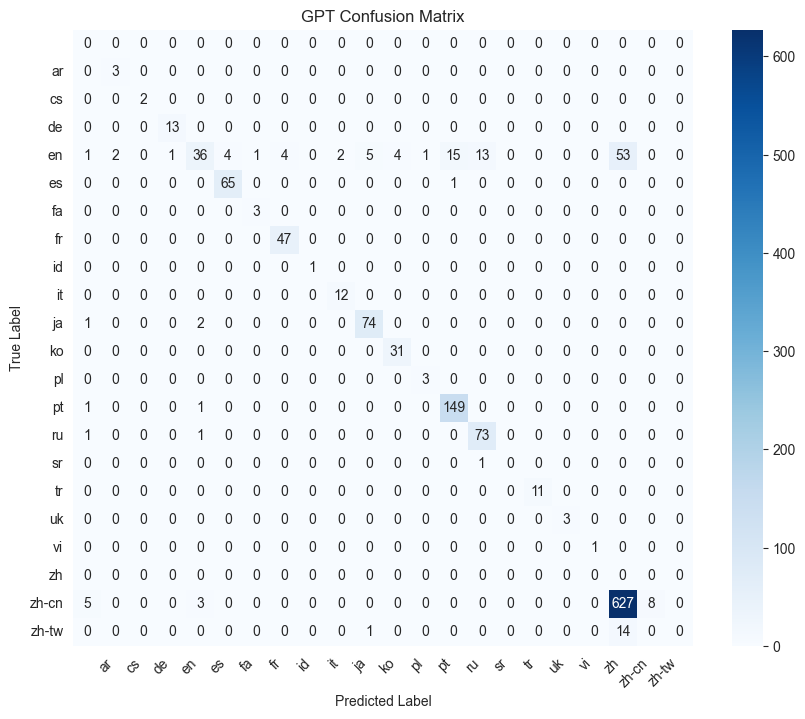

      Metric     Value
0   Accuracy  0.411538
1  Precision  0.733607
2     Recall  0.735088
3   F1-score  0.700572


In [10]:
calculate_accuracy(data, 'gpt_src_lang', 'GPT Confusion Matrix')

## DeepL Source Language Accuracy

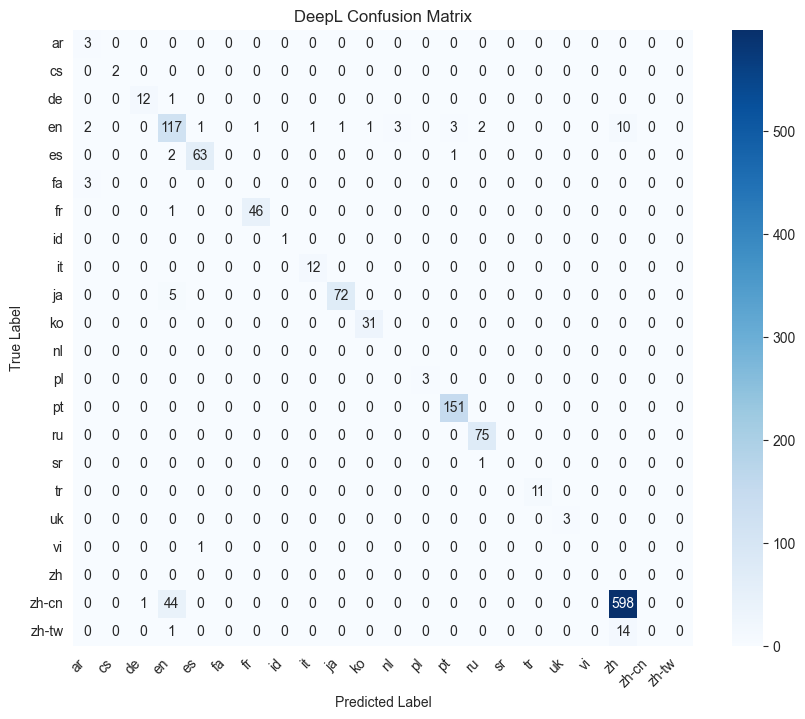

      Metric     Value
0   Accuracy  0.463077
1  Precision  0.624732
2     Recall  0.664334
3   F1-score  0.637643


In [11]:
calculate_accuracy(data, 'deepL_src_lang', 'DeepL Confusion Matrix')

## AWS Source Language Accuracy

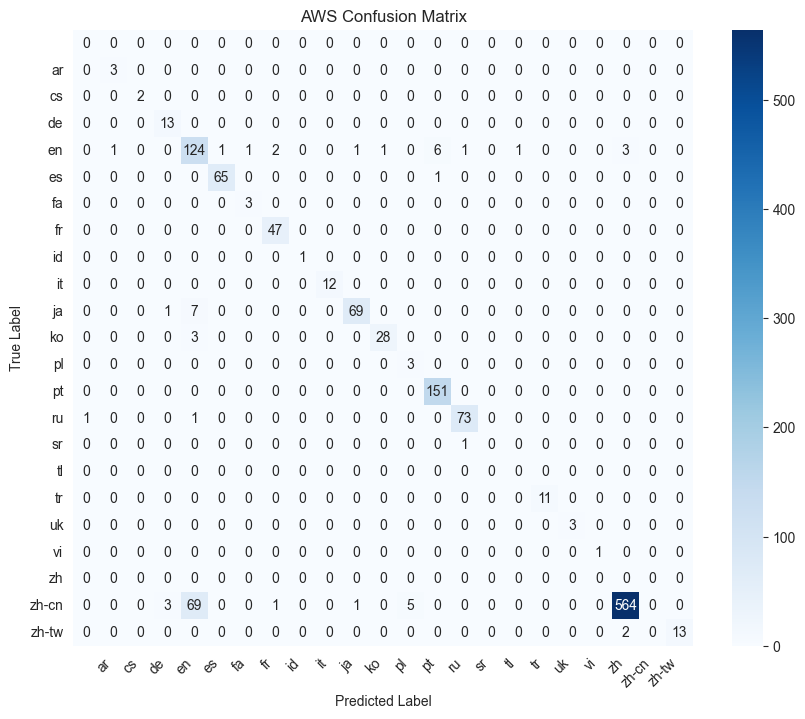

      Metric     Value
0   Accuracy  0.478462
1  Precision  0.697338
2     Recall  0.760757
3   F1-score  0.719222


In [12]:
calculate_accuracy(data, 'aws_src_lang', 'AWS Confusion Matrix')

## BLEU Score Violin Plot

41.99396950722021 52.93593031083944 49.466975093251826


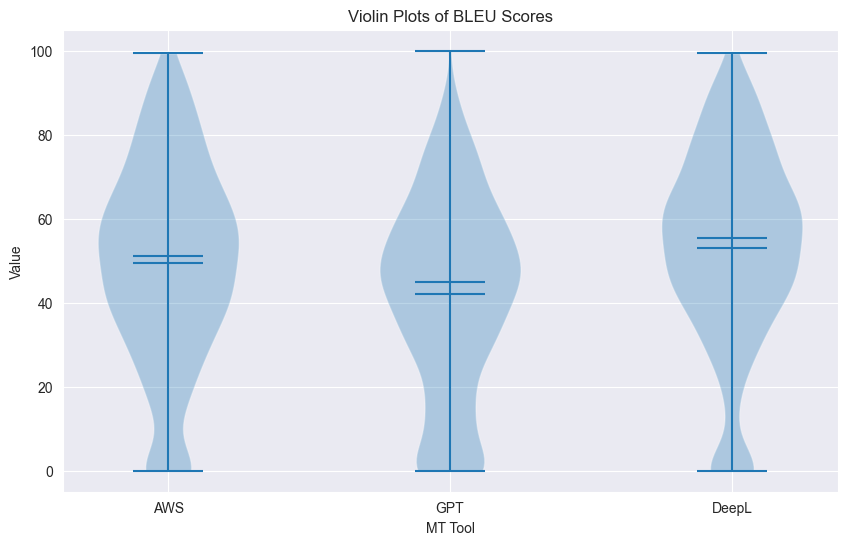

In [13]:
data_sets = load_bleu_results()
violin_plot('BLEU', data_sets)

## METEOR Score Violin Plot

0.6005048420030379 0.5941988662825002 0.6201060969705211


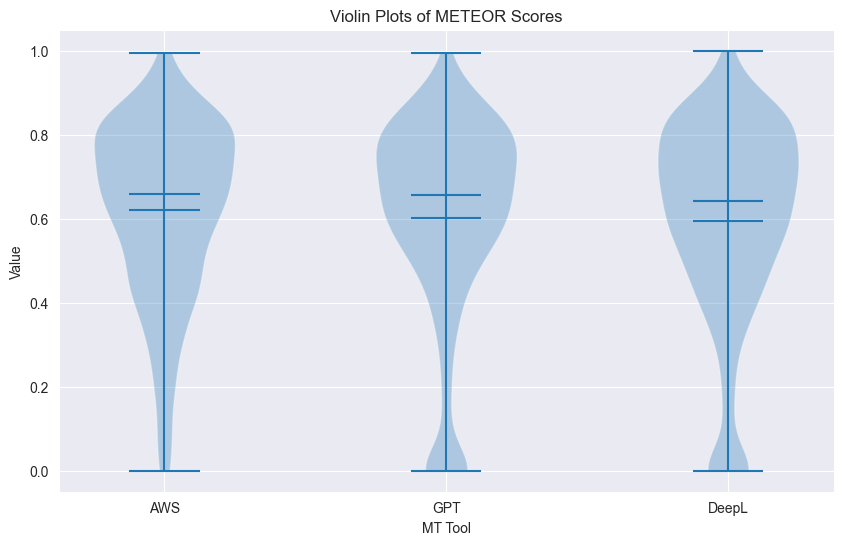

In [14]:
data_sets = load_meteor_results()
violin_plot('METEOR', data_sets)

## ROUGE Score Violin Plot

0.6449736419050466 0.682284428486329 0.6735319115368882


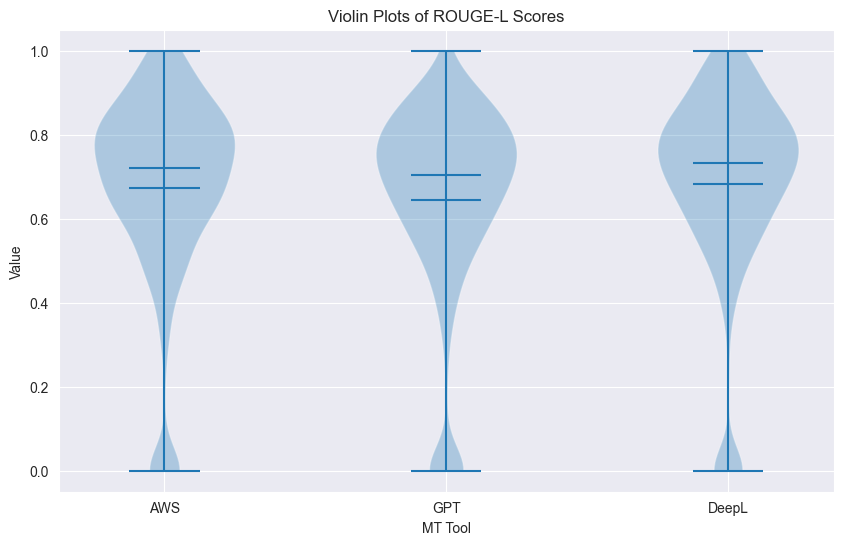

In [15]:
data_sets = load_rouge_data()
violin_plot('ROUGE-L', data_sets)

## COMET Score Violin Plot

0.23796213219774473 0.3279870139916443 0.3230064908375695


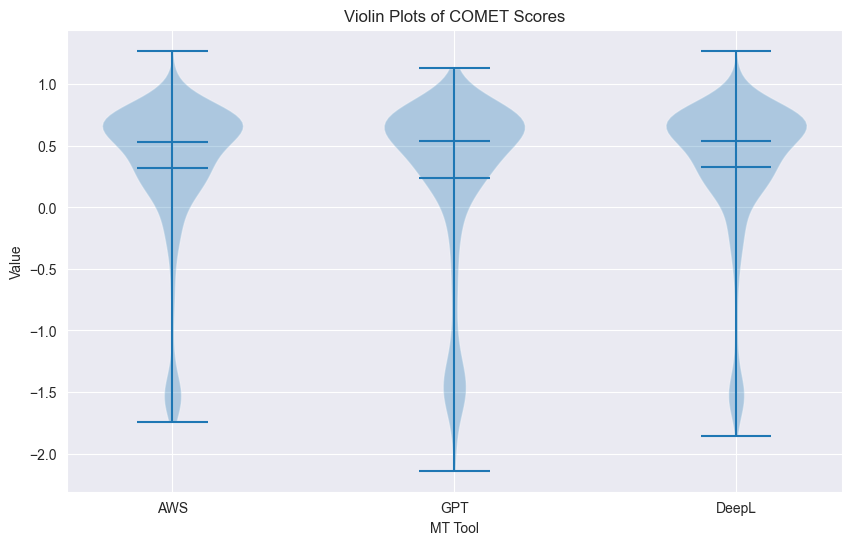

In [16]:
data_sets = load_comet_results()
violin_plot('COMET', data_sets)

## BERTScore Violin Plot

0.7385014642804192 0.7626735782338432 0.7538751537259466


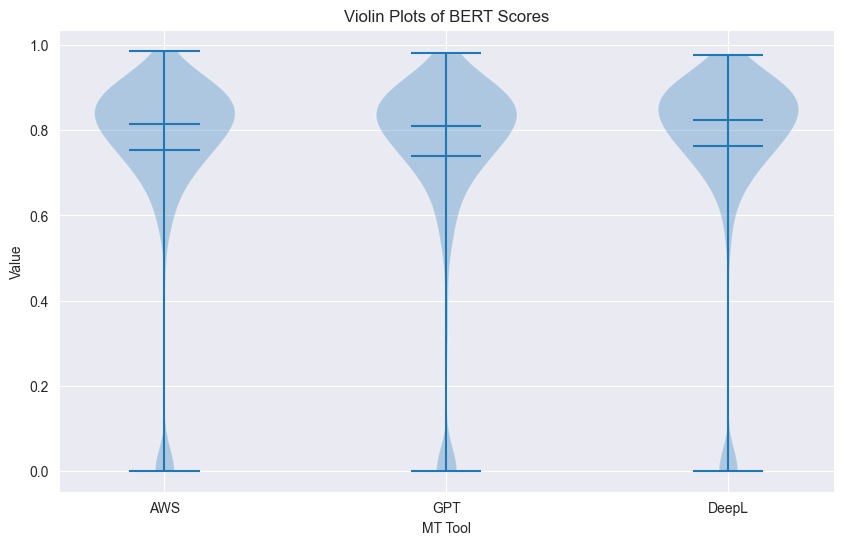

In [17]:
data_sets = load_bert_results()
violin_plot('BERT', data_sets)